<a href="https://www.kaggle.com/code/bilalshabbir/yoga-pose-classification-cnn-keras?scriptVersionId=97707835" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform
import os

## Fetching Label Names

In [2]:
labels=list()
path='../input/yoga-pose-classification/YogaPoses/'
os.listdir(path)
for i in os.listdir(path):
    labels.append(i)
    

In [3]:
labels

['Downdog', 'Tree', 'Plank', 'Warrior2', 'Goddess']

In [4]:
## Counting the Samples
Total_sample=0
for i in os.listdir(path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :Downdog= 196
Length of :Tree= 198
Length of :Plank= 197
Length of :Warrior2= 198
Length of :Goddess= 199
Total Samples:988


In [5]:
!pip install tqdm
from tqdm import tqdm

### Preprocessing Images
1. Resizing
2. Scaling

In [6]:
img_size=170     # 170x170
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(path+img)):
        if i<300:
            img_file=imread(path+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i=i+1
    i=0
X=np.asarray(X)
Y=np.asarray(Y)

100%|██████████| 199/199 [00:02<00:00, 67.31it/s]


In [7]:
X[0]   ## Skimage scale image in range of 0 to 1

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

### Visualizing the Images

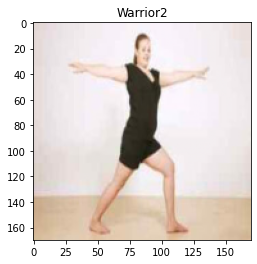

In [8]:
plt.imshow(X[601])
plt.title(labels[Y[601]])
plt.show()

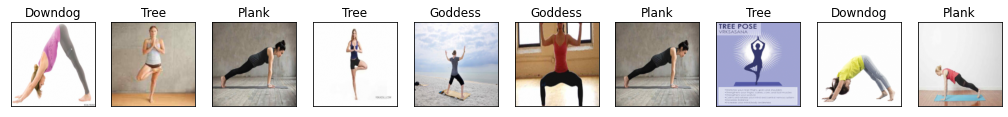

In [9]:
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,987)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

### Spliting the Data into the train & test

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

In [11]:
print('Shapes of Data Split into Train & Test Part')
print(f'Training Data->{X_train.shape},{Y_train.shape} Testing Data->{X_test.shape,Y_test.shape}')

Shapes of Data Split into Train & Test Part
Training Data->(790, 170, 170, 3),(790,) Testing Data->((198, 170, 170, 3), (198,))


In [12]:
# OneHot-Encoding
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

In [13]:
Y_train.shape,Y_test.shape

((790, 5), (198, 5))

### Building the CNN Model

In [14]:
# CNN Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [15]:
model=Sequential()
model.add(Conv2D(64,(5,5),padding='same',activation='relu',input_shape=(170,170,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(len(labels),activation='softmax'))  # Multi-class Classification Problem
model.compile(loss='categorical_crossentropy',optimizer='adam'
             ,metrics=['accuracy'])
model.summary()

2022-06-07 10:38:07.226975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 10:38:07.352438: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 10:38:07.353583: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 170, 170, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 32)        32800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 128)       36992     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 50)        5

2022-06-07 10:38:07.355755: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-07 10:38:07.356157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 10:38:07.357440: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 10:38:07.358573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [16]:
from time import time
tic=time()
epoch=50
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=epoch,batch_size=32,verbose=1)
toc=time()
print(f'Training Time {toc-tic}')

2022-06-07 10:38:10.938412: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-06-07 10:38:12.599401: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


20/20 [==============================] - 9s 68ms/step - loss: 1.6748 - accuracy: 0.1835 - val_loss: 1.6058 - val_accuracy: 0.2215
Epoch 2/50
20/20 [==============================] - 1s 32ms/step - loss: 1.5560 - accuracy: 0.3576 - val_loss: 1.4050 - val_accuracy: 0.4114
Epoch 3/50
20/20 [==============================] - 1s 32ms/step - loss: 1.1831 - accuracy: 0.5348 - val_loss: 1.3123 - val_accuracy: 0.4747
Epoch 4/50
20/20 [==============================] - 1s 32ms/step - loss: 1.0582 - accuracy: 0.6044 - val_loss: 1.5821 - val_accuracy: 0.5380
Epoch 5/50
20/20 [==============================] - 1s 32ms/step - loss: 0.9769 - accuracy: 0.6456 - val_loss: 1.1178 - val_accuracy: 0.6646
Epoch 6/50
20/20 [==============================] - 1s 36ms/step - loss: 0.6166 - accuracy: 0.7737 - val_loss: 1.2181 - val_accuracy: 0.6139
Epoch 7/50
20/20 [==============================] - 1s 33ms/step - loss: 0.4753 - accuracy: 0.8323 - val_loss: 0.8887 - val_accuracy: 0.6962
Epoch 8/50
20/20 [======

Text(0.5, 1.0, 'Loss evolution')

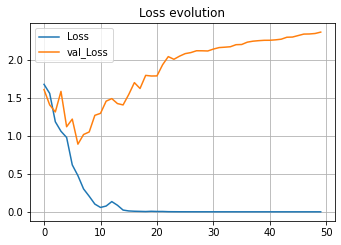

In [17]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

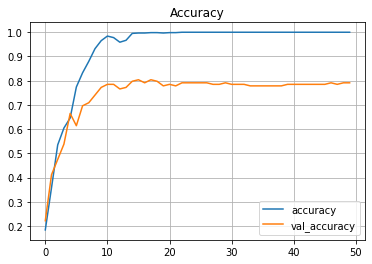

In [18]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

### Saving the Model

In [19]:
model.save('./Simple_CNN_model.h5')

###  Evaluating the Model

In [20]:
score=model.evaluate(X_test,Y_test,verbose=1)

7/7 [==============================] - 0s 20ms/step - loss: 1.6239 - accuracy: 0.8333


In [21]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

[2 4 3 4 4 3 0 3 3 0 4 2 3 3 1 4 2 2 4 3 4 3 2 4 3 0 3 0 4 3 4 2 2 0 0 0 0
 1 1 2 0 2 3 0 1 4 1 4 2 1 3 4 3 2 3 2 0 2 2 2 3 0 1 3 2 4 3 2 1 1 2 0 1 4
 2 2 1 3 2 0 3 0 3 2 0 4 1 2 3 0 4 3 3 4 2 3 1 3 0 0 2 4 2 0 0 3 1 3 1 1 2
 1 1 0 4 2 1 1 3 1 0 3 3 4 0 4 0 4 3 0 1 2 2 1 0 4 1 0 0 3 4 1 3 3 2 3 1 0
 0 4 3 2 4 3 0 3 0 0 3 0 3 4 1 1 1 0 0 0 1 4 4 1 2 4 2 0 1 2 2 1 0 1 4 3 4
 3 4 3 2 3 0 4 1 0 2 1 0 3]


In [22]:
Y_test=np.argmax(Y_test,axis=1)

In [23]:
print(Y_test)

[2 4 2 4 4 3 0 3 3 0 4 2 3 3 1 4 0 2 4 3 4 3 2 4 3 0 4 0 4 4 4 2 2 0 0 0 0
 1 1 2 0 3 2 0 1 4 1 3 0 1 4 4 3 2 4 2 0 2 2 2 3 1 1 3 2 4 3 2 1 1 2 0 1 4
 0 2 1 3 2 0 3 2 2 2 0 4 1 2 3 0 4 3 3 1 2 3 1 4 0 2 2 3 2 3 0 3 1 3 1 1 0
 3 1 1 4 2 1 1 3 1 2 4 3 4 0 4 4 4 1 0 1 2 2 1 0 4 1 0 0 3 4 1 3 3 2 3 1 0
 0 4 3 2 4 3 0 3 0 0 4 0 3 4 1 1 1 0 0 0 1 4 1 1 2 4 2 3 1 2 2 1 0 1 0 4 4
 3 4 3 2 4 3 4 1 0 2 1 0 3]


In [24]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test,y_pred))

[[34  0  4  0  1]
 [ 2 35  0  1  2]
 [ 3  0 33  3  0]
 [ 3  1  1 33  2]
 [ 1  0  0  9 30]]


### Classification Report

In [25]:
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        39
           1       0.97      0.88      0.92        40
           2       0.87      0.85      0.86        39
           3       0.72      0.82      0.77        40
           4       0.86      0.75      0.80        40

    accuracy                           0.83       198
   macro avg       0.84      0.83      0.83       198
weighted avg       0.84      0.83      0.83       198



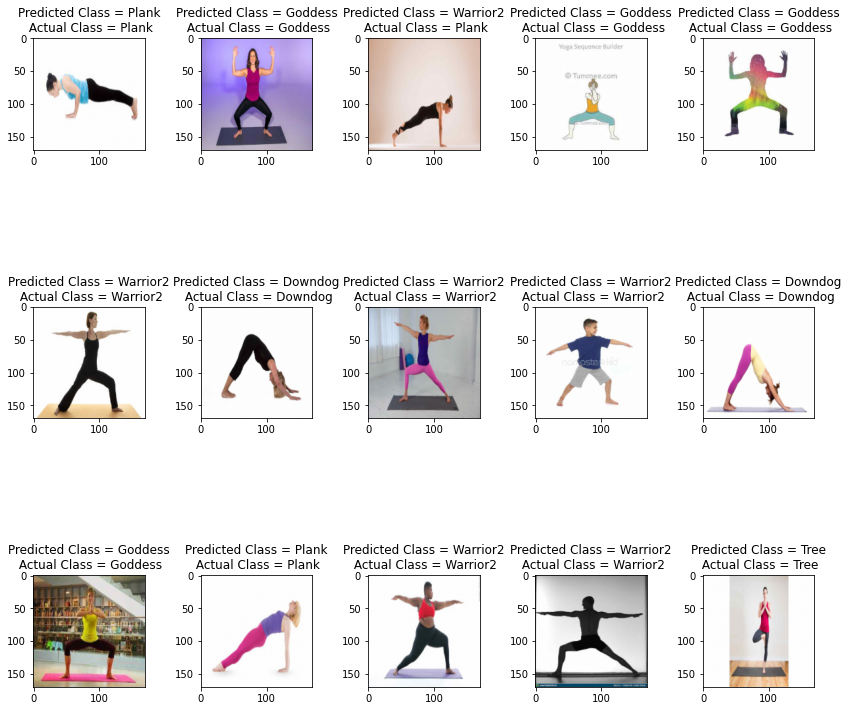

In [26]:
predicted_classes=model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 3
W = 5
fig, axes = plt.subplots(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {labels[predicted_classes[i]]}\n Actual Class = {labels[Y_classes[i]]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)